# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [4]:
# 讀取資料檔
f = os.path.join(dir_data, 'application_train.csv')
df = pd.read_csv(f)

In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in df:
    if df[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(df[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            df[col] = le.fit_transform(df[col])            
print(df.shape)
df.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
df['DAYS_EMPLOYED_ANOM'] = df["DAYS_EMPLOYED"] == 365243
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_BIRTH_YEAR'] = round(df['DAYS_BIRTH']/365)
df['DAYS_BIRTH_YEAR'] 

0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
5         46.0
6         38.0
7         52.0
8         55.0
9         40.0
10        28.0
11        56.0
12        37.0
13        39.0
14        40.0
15        24.0
16        35.0
17        27.0
18        49.0
19        31.0
20        50.0
21        41.0
22        31.0
23        68.0
24        31.0
25        53.0
26        51.0
27        44.0
28        27.0
29        28.0
          ... 
307481    57.0
307482    39.0
307483    68.0
307484    35.0
307485    33.0
307486    44.0
307487    63.0
307488    28.0
307489    45.0
307490    27.0
307491    30.0
307492    57.0
307493    48.0
307494    41.0
307495    57.0
307496    48.0
307497    46.0
307498    52.0
307499    47.0
307500    56.0
307501    36.0
307502    44.0
307503    33.0
307504    46.0
307505    67.0
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    46.0
Name: DAYS_BIRTH_YEAR, Length: 307511, dtype: float64

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [29]:
bins = np.linspace(0,100,11)
df['DAYS_BIRTH_YEAR_DISCRET'] = pd.cut(df['DAYS_BIRTH_YEAR'], bins)
df['DAYS_BIRTH_YEAR_DISCRET'].value_counts()

(30.0, 40.0]     82770
(40.0, 50.0]     75509
(50.0, 60.0]     67955
(20.0, 30.0]     48869
(60.0, 70.0]     32408
(90.0, 100.0]        0
(80.0, 90.0]         0
(70.0, 80.0]         0
(10.0, 20.0]         0
(0.0, 10.0]          0
Name: DAYS_BIRTH_YEAR_DISCRET, dtype: int64

In [49]:
a = list(df['DAYS_BIRTH_YEAR_DISCRET'].value_counts().sort_index().values)
a

[0, 0, 48869, 82770, 75509, 67955, 32408, 0, 0, 0]

In [50]:
b = list(df['DAYS_BIRTH_YEAR_DISCRET'].value_counts().sort_index().index)
b

[Interval(0.0, 10.0, closed='right'),
 Interval(10.0, 20.0, closed='right'),
 Interval(20.0, 30.0, closed='right'),
 Interval(30.0, 40.0, closed='right'),
 Interval(40.0, 50.0, closed='right'),
 Interval(50.0, 60.0, closed='right'),
 Interval(60.0, 70.0, closed='right'),
 Interval(70.0, 80.0, closed='right'),
 Interval(80.0, 90.0, closed='right'),
 Interval(90.0, 100.0, closed='right')]

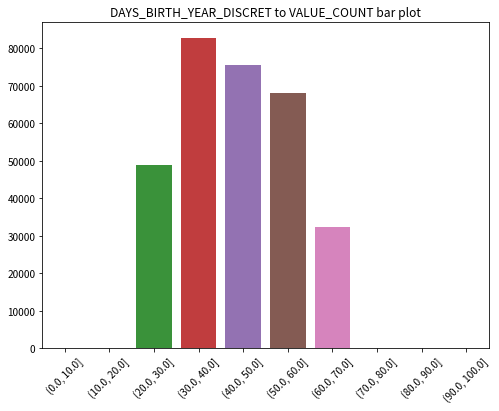

In [54]:
import seaborn as sns # 另一個繪圖-樣式套件
year_group_sorted = list(df['DAYS_BIRTH_YEAR_DISCRET'].value_counts().sort_index().index)

plt.figure(figsize=(8,6))
sns.barplot(b,a)
plt.title('DAYS_BIRTH_YEAR_DISCRET to VALUE_COUNT bar plot')
plt.xticks(rotation=45)
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


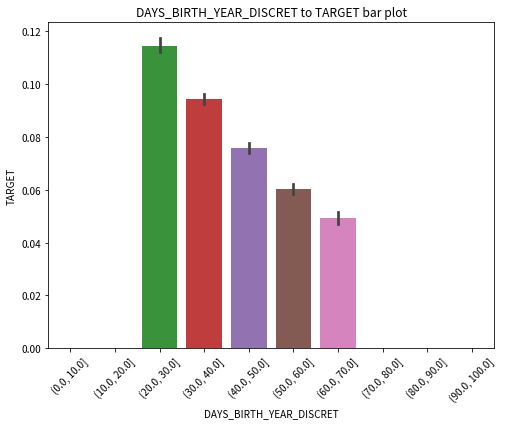

In [55]:
import seaborn as sns # 另一個繪圖-樣式套件

plt.figure(figsize=(8,6))
sns.barplot(df['DAYS_BIRTH_YEAR_DISCRET'],df['TARGET'])
plt.title('DAYS_BIRTH_YEAR_DISCRET to TARGET bar plot')
plt.xticks(rotation=45)
plt.show()